In [1]:
import numpy as np

from tensorflow.keras import optimizers
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras import utils
from tensorflow.keras.datasets import mnist

from tensorflow.keras.models import Model


import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import pandas as pd



(train_data, train_labels), (test_data,test_labels) = mnist.load_data()

In [2]:
train_data.shape

(60000, 28, 28)

In [4]:
model = Sequential([
    Dense(512,activation='relu',input_shape=(28*28,)),
    Dense(256, activation = 'relu'),
    Dense(128, activation = 'relu'),
    Dense(256, activation = 'relu'),
    Dense(512, activation = 'relu'),
    Dense(28*28, activation = 'sigmoid')
])
model.compile(loss='mse', optimizer='adam')

In [5]:
model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_7 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_8 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_9 (Dense)              (None, 256)               33024     
_________________________________________________________________
dense_10 (Dense)             (None, 512)               131584    
_________________________________________________________________
dense_11 (Dense)             (None, 784)               402192    
Total params: 1,132,944
Trainable params: 1,132,944
Non-trainable params: 0
____________________________________________

In [6]:
x = train_data.reshape(60000,28*28)/255
x.shape, np.min(x), np.max(x)

((60000, 784), 0.0, 1.0)

In [7]:
x.shape

(60000, 784)

In [8]:
model.fit(x,x,epochs=3,batch_size=256)

Epoch 1/3
235/235 [==============================] - 8s 32ms/step - loss: 0.0453
Epoch 2/3
235/235 [==============================] - 7s 32ms/step - loss: 0.0157
Epoch 3/3
235/235 [==============================] - 8s 32ms/step - loss: 0.0114


Show the output of middle layer

In [10]:
dense1_layer_model = Model(inputs=model.input, outputs=model.get_layer('dense_8').output)
middle_output = dense1_layer_model.predict(x)

In [13]:
middle_output.shape

(60000, 128)

Show the output of prediction


In [17]:
preds = model.predict(x)
preds = preds.reshape(60000,28,28)

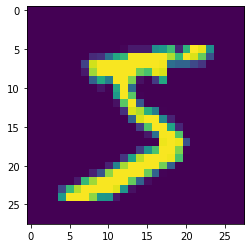

In [19]:
idx=0
plt.imshow(train_data[idx])

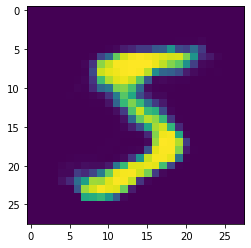

In [20]:
plt.imshow(preds[idx])

UMAP

In [24]:
!pip install umap-learn

     |████████████████████████████████| 80 kB 7.0 MB/s 
     |████████████████████████████████| 1.1 MB 37.5 MB/s 
  Created wheel for umap-learn: filename=umap_learn-0.5.1-py3-none-any.whl size=76564 sha256=8256f7e82f86a5e4fbd51befed37a352c826d4836d0ed70b0f609cf3d56fb758
  Stored in directory: /root/.cache/pip/wheels/01/e7/bb/347dc0e510803d7116a13d592b10cc68262da56a8eec4dd72f
  Created wheel for pynndescent: filename=pynndescent-0.5.4-py3-none-any.whl size=52373 sha256=05aa7f88e5aeb0a6dc30565154327c6d5c8429530bea8d8fedaa9ca58a28163b
  Stored in directory: /root/.cache/pip/wheels/d0/5b/62/3401692ddad12324249c774c4b15ccb046946021e2b581c043
Successfully built umap-learn pynndescent


In [38]:
import umap

reducer = umap.UMAP()
embedding = reducer.fit_transform(middle_output)


In [39]:
embedding

array([[-0.0151145 ,  2.2657735 ],
       [-3.6475394 , -3.3756855 ],
       [ 0.09668491, 14.054063  ],
       ...,
       [-0.13124526,  1.7418945 ],
       [ 3.5181096 , -1.9257467 ],
       [ 3.4555237 ,  6.4347625 ]], dtype=float32)

(60000, 2)


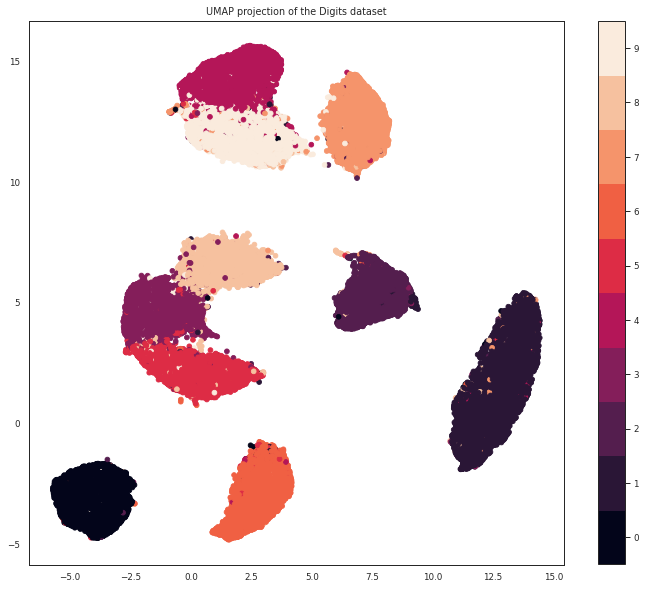

In [40]:
print(embedding.shape)
fig, ax = plt.subplots(figsize=(12, 10))

plt.scatter(embedding[:, 0], embedding[:, 1],c =train_labels )
plt.gca().set_aspect('equal', 'datalim')
plt.gca().set_aspect('equal', 'datalim')
plt.colorbar(boundaries=np.arange(11)-0.5).set_ticks(np.arange(10))
plt.title('UMAP projection of the Digits dataset')
plt.show()

UMAP of Original MNIST

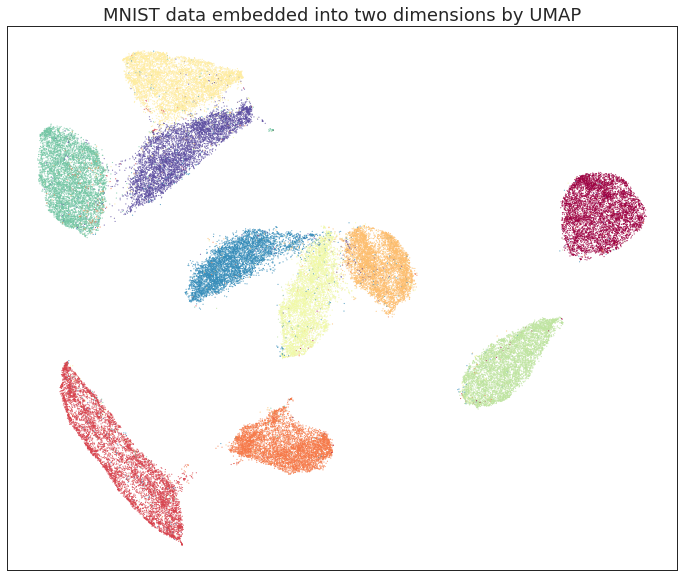

In [41]:
import umap
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(context="paper", style="white")

# mnist = fetch_openml("mnist_784", version=1)

reducer = umap.UMAP(random_state=42)
embedding = reducer.fit_transform(x)

fig, ax = plt.subplots(figsize=(12, 10))
plt.scatter(embedding[:, 0], embedding[:, 1], c=train_labels, cmap="Spectral", s=0.1)
plt.setp(ax, xticks=[], yticks=[])
plt.title("MNIST data embedded into two dimensions by UMAP", fontsize=18)

plt.show()